In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/major project

Mounted at /content/drive
/content/drive/My Drive/major project


In [ ]:
d=pd.read_csv('book_data.csv')

In [ ]:
d.head()

,title,author,desc,genre,pages,reviews,rating,totalratings
0,The Fault in Our Stars,John Green,Despite the tumor-shrinking medical miracle th...,"Young Adult,Romance,Fiction,Contemporary,Reali...",313,158776,4.19,3819326
1,Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago world, s...","Young Adult,Science Fiction,Dystopia,Fiction,F...",487,110042,4.18,3099689
2,Harry Potter and the Deathly Hallows,J.K. Rowling,Harry Potter is leaving Privet Drive for the l...,"Fantasy,Young Adult,Fiction,Fantasy,Magic,Chil...",759,68974,4.62,2984351
3,Animal Farm,"George Orwell,Russell Baker,C.M. Woodhouse",Librarian's note: There is an Alternate Cover ...,"Classics,Fiction,Science Fiction,Dystopia,Fant...",141,61970,3.96,2938072
4,Harry Potter and the Chamber of Secrets,"J.K. Rowling,Mary GrandPrÃ©",Ever since Harry Potter had come home for the ...,"Fantasy,Young Adult,Fiction,Fantasy,Magic,Chil...",341,57146,4.43,2934616


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         99999 non-null   object 
 1   author        100000 non-null  object 
 2   desc          93228 non-null   object 
 3   genre         89533 non-null   object 
 4   pages         100000 non-null  int64  
 5   reviews       100000 non-null  int64  
 6   rating        100000 non-null  float64
 7   totalratings  100000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


In [ ]:
d=d.drop('desc',axis=1)
d=d.drop('genre',axis=1)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         99999 non-null   object 
 1   author        100000 non-null  object 
 2   pages         100000 non-null  int64  
 3   reviews       100000 non-null  int64  
 4   rating        100000 non-null  float64
 5   totalratings  100000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [ ]:
d=d[:50000]

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         50000 non-null  object 
 1   author        50000 non-null  object 
 2   pages         50000 non-null  int64  
 3   reviews       50000 non-null  int64  
 4   rating        50000 non-null  float64
 5   totalratings  50000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ MB


## Top 15 most rated books

In [ ]:
most_rated = d[['title','totalratings']].head(20)
most_rated

,title,totalratings
0,The Fault in Our Stars,3819326
1,Divergent,3099689
2,Harry Potter and the Deathly Hallows,2984351
3,Animal Farm,2938072
4,Harry Potter and the Chamber of Secrets,2934616
5,"The Lion, the Witch and the Wardrobe",2256904
6,A Game of Thrones,2097707
7,The Lovely Bones,2095009
8,Fifty Shades of Grey,2070036
9,Fahrenheit 451,1803486


<Figure size 1080x720 with 0 Axes>

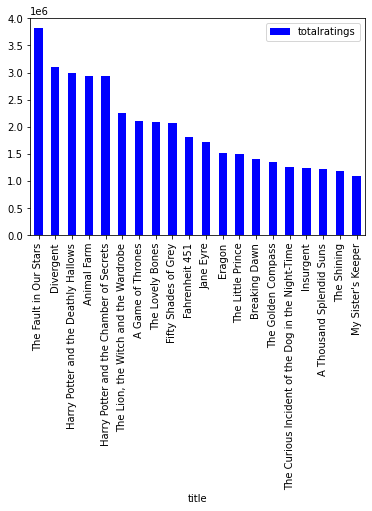

In [ ]:
plt.figure(figsize=(15,10))
most_rated.plot(kind='bar',x='title',y='totalratings', color='blue')
plt.show()

## Authors with most books

In [ ]:
count=d['author'].value_counts()
count=count.to_frame()
count=count[:20]
count

,author
R.L. Stine,71
Lynn Hagen,61
Louis L'Amour,57
Lynne Graham,55
Joyee Flynn,53
Agatha Christie,52
Mi-Ri Hwang,48
Elinor M. Brent-Dyer,46
Harry Turtledove,46
Humayun Ahmed,42


<AxesSubplot:>

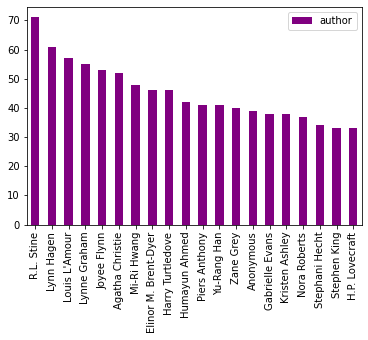

In [ ]:
count.plot(kind='bar', color='purple')

## Top 10 highly rated authors

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


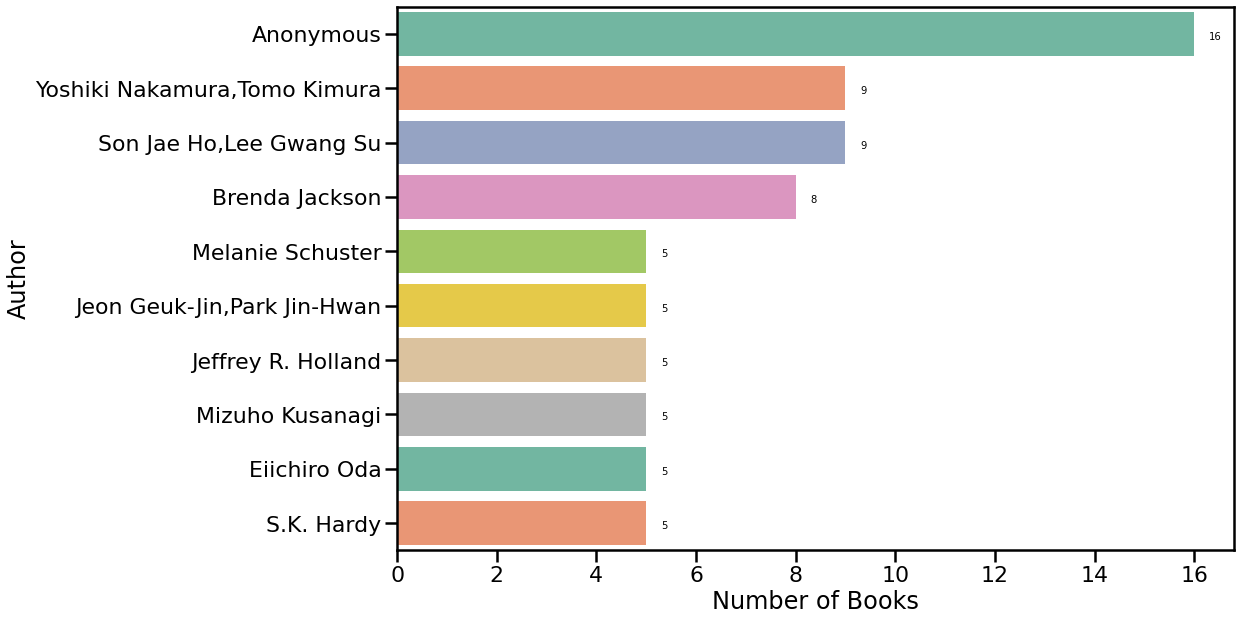

In [ ]:
high_rated_author = d[d['rating']>=4.5]
high_rated_author = high_rated_author.groupby('author')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('author')

plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Author")

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

## Is there relationship between ratings and review counts?

<ipython-input-15-fd2f5f50165f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  d.dropna(0, inplace=True)


<Figure size 1080x720 with 0 Axes>

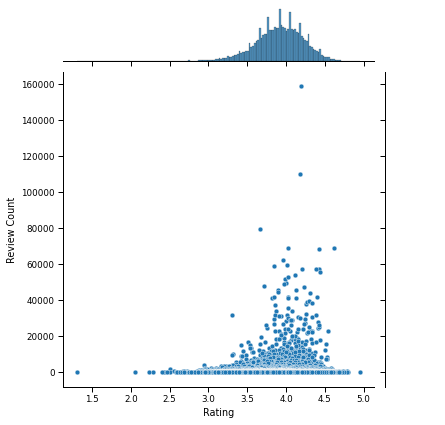

In [ ]:

plt.figure(figsize=(15,10))
d.dropna(0, inplace=True)
sns.set_context('paper')

ax =sns.jointplot(x="rating",y='reviews', kind='scatter',  data= d[['reviews', 'rating']])
ax.set_axis_labels("Rating","Review Count")
plt.show()

## Is there a relationship between number of pages and ratings

<Figure size 1080x720 with 0 Axes>

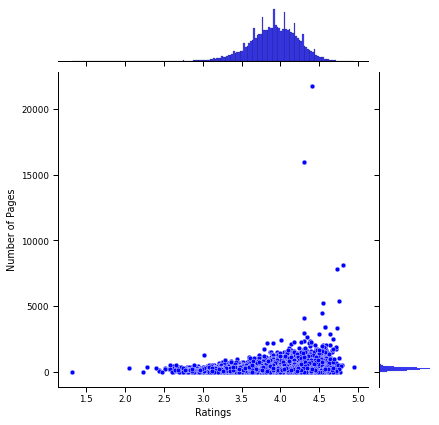

In [ ]:
plt.figure(figsize=(15,10))
sns.set_context('paper')

ax = sns.jointplot(x="rating", y="pages", data = d, color = 'blue')
ax.set_axis_labels("Ratings", "Number of Pages")

##Is there a relationship between ratings and ratings count?

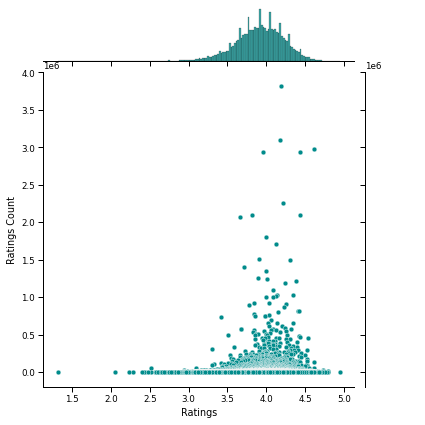

In [ ]:
sns.set_context('paper')
ax = sns.jointplot(x="rating", y="totalratings", data = d, color = 'darkcyan')
ax.set_axis_labels("Ratings", "Ratings Count")

##Which are the books with the highest reviews?


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


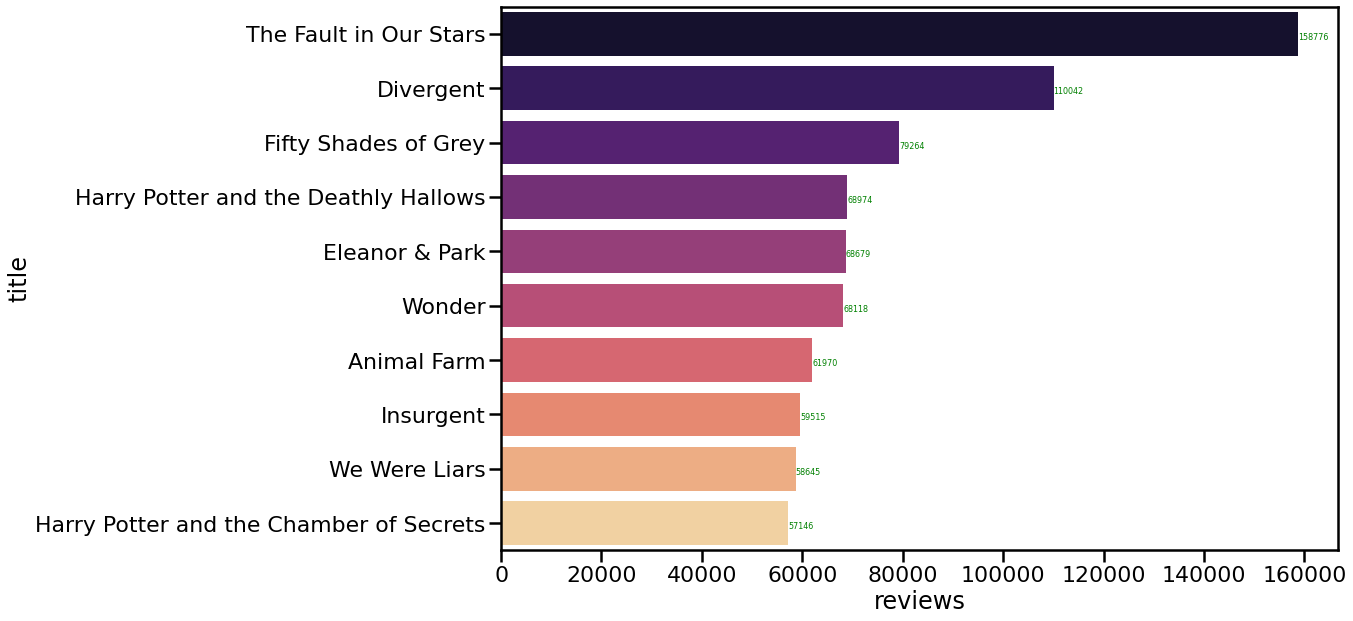

In [ ]:
most_text = d.sort_values('reviews', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.set_context('poster')
ax = sns.barplot(most_text['reviews'], most_text.index, palette='magma')
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=8,color='green')
plt.show()